# Comparison of spectrum between eNATL60 outputs and Alitka Satellite : method gonzag cloud on one track

Requisites :
 - git clone https://github.com/auraoupa/gonzag_cloud
 
 


In [1]:
import sys,os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
GONZAG_CLOUD_DIR = '/home/jovyan/gonzag_cloud' ; 
sys.path.append(GONZAG_CLOUD_DIR)
import gonzag as gzc


In [3]:
import xarray as xr
import intake
import gcsfs
import os
import pandas as pd
import matplotlib.pyplot as plt

# With gonzag_cloud

In [4]:
model = 'eNATL60'
region = '1'
season = 'fma'
surf='surface_hourly'
name_mod = model+'-Region'+region+'-'+season
name_ssh_mod = 'sossheig'
name_lsm_mod = 'tmask' 
name_lat_mod = 'lat'
name_lon_mod = 'lon'
name_time_mod = 'time_counter'
l_griddist = False
period_mod = ['2010-02-01','2010-04-30']

In [5]:
name_sat= 'Altika'
tag_sat_catalog = 'al'
name_ssh_sat='sla_unfiltered'
name_time_sat='time'
period_sat = ['2014-02-01','2014-04-30'] #should cover the same period of a different year if needed

In [6]:

gcs = gcsfs.GCSFileSystem(requester_pays=True)

cat = intake.open_catalog('../../SWOT-AdAC/catalog.yaml')
dsmod = cat[model](region=region,depth=surf, season=season).to_dask()

In [7]:
dsmod

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [8]:
from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean/altimetry.yaml")
dssat  = cat[tag_sat_catalog].to_dask()

In [9]:
dssat

<xarray.Dataset>
Dimensions:         (time: 34340107)
Coordinates:
    latitude        (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    longitude       (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
  * time            (time) datetime64[ns] 2013-03-14T05:44:50.445185 ... 2015...
Data variables:
    cycle           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
    dac             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    lwe             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    mdt             (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    ocean_tide      (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_filtered    (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    sla_unfiltered  (time) float64 dask.array<chunksize=(34340107,), meta=np.ndarray>
    track           (time) int16 dask.array<chunksize=(34340107,), meta=np.ndarray>
Attributes: (12/24)
    Conventions:               CF-1.6
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    cdm_data_type:             Swath
    comment:                   Sea surface height measured by altimeters refe...
    contact:                   servicedesk.cmems@mercator-ocean.eu
    creator_email:             servicedesk.cmems@mercator-ocean.eu
    ...                        ...
    software_version:          6.2_DUACS_DT2018_baseline
    source:                    Altika measurements
    ssalto_duacs_comment:      The reference mission used for the altimeter i...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   SSALTO/DUACS Delayed-Time Level-3 sea surface ...
    title:                     DT Altika Global Ocean Along track SSALTO/DUAC...

In [10]:
ModelGrid = gzc.ModGrid( dsmod, period_mod, name_lon_mod, name_lat_mod , name_time_mod, dsmod, name_lsm_mod )



 *** what we use to define model land-sea mask:
    => "tmask" in dataset 

 *** Skipping computation of angle distortion of the model grid! ("-D" option not invoked)...

 *** About model gridded (source) domain:
     * shape =  (763, 611)
     * horizontal resolution:  0.016657295  degrees or  1.8507920147292316  km
     * Is this a global domain w.r.t longitude:  False
       ==> this is a regional domain
       ==> working in the [0:360] frame...
     * lon_min, lon_max =  281.97 292.16
     * lat_min, lat_max =  30.0 39.99
     * should we pay attention to possible STRONG local distorsion in the grid:  False
     * number of time records of interest for the interpolation to come:  2112
       ==> time record dates: 2010-02-01 to 2010-04-30, included



In [11]:
SatelliteTrack = gzc.SatTrack( dssat, period_sat, name_time_sat, name_ssh_sat, domain_bounds=ModelGrid.domain_bounds, l_0_360=ModelGrid.l360 )

 *** [SatTrack()] Analyzing the time vector in dataset ...

 *** About satellite track (target) domain:
     * number of time records of interest for the interpolation to come:  10225
       ==> time record indices: 14883510 to 19033581, included

       separated in 86 tracks


In [12]:
print(ModelGrid.time)

['2010-02-01T00:30:00.000000000' '2010-02-01T01:30:00.000000000'
 '2010-02-01T02:30:00.000000000' ... '2010-04-30T21:30:00.000000000'
 '2010-04-30T22:30:00.000000000' '2010-04-30T23:30:00.000000000']


In [13]:
print(ModelGrid.lat.values)

[[29.996578 29.99662  29.99666  ... 30.02353  30.023575 30.02362 ]
 [30.01064  30.010681 30.010723 ... 30.037706 30.037752 30.037798]
 [30.024696 30.024738 30.02478  ... 30.05188  30.051926 30.051973]
 ...
 [39.75571  39.756042 39.756374 ... 39.970264 39.97063  39.970997]
 [39.767307 39.76764  39.76797  ... 39.982243 39.98261  39.982975]
 [39.7789   39.779232 39.779564 ... 39.994217 39.994583 39.994953]]


In [14]:
print(ModelGrid.lon.values)

[[281.99213 282.0088  282.02545 ... 292.12457 292.14124 292.1579 ]
 [281.9921  282.00876 282.02542 ... 292.1245  292.14117 292.15784]
 [281.99207 282.00873 282.0254  ... 292.12445 292.1411  292.15778]
 ...
 [281.85104 281.86768 281.88428 ... 291.96457 291.98123 291.99786]
 [281.85065 281.86728 281.88388 ... 291.9641  291.98077 291.99744]
 [281.85028 281.86688 281.88348 ... 291.96368 291.98032 291.99698]]


In [15]:
print(ModelGrid.domain_bounds)

[29.996578, 281.96854, 39.994953, 292.1579]


In [16]:
print(SatelliteTrack.time)

['2014-02-02T23:14:13.207444000' '2014-02-02T23:14:14.187444000'
 '2014-02-02T23:14:15.167444000' ... '2014-04-29T23:14:02.891097000'
 '2014-04-29T23:14:03.871097000' '2014-04-29T23:14:04.851097000']


In [17]:
print(SatelliteTrack.lat.values)

[39.973308 39.915793 39.858275 ... 30.154056 30.096212 30.038367]


In [18]:
print(SatelliteTrack.lon.values)

[289.681787 289.662966 289.644169 ... 287.489777 287.474097 287.458431]


In [19]:
print(SatelliteTrack.size)

10225


In [20]:
print(SatelliteTrack.keepit)

(array([  93133,   93134,   93135, ..., 4148222, 4148223, 4148224]),)


In [21]:
import time ; # to report execution speed of certain parts of the code...
import pandas as pd
import numpy as np
from gonzag.config import ldebug, ivrb, nb_talk, l_plot_meshes, deg2km, rfactor, search_box_w_km, l_save_track_on_model_grid, l_plot_meshes, rmissval
from gonzag.utils  import *
from gonzag.bilin_mapping import BilinTrack


In [22]:
MG=ModelGrid
ST=SatelliteTrack 
one_track=0

In [23]:
jt1=ST.index_tracks[one_track][0]
jt2=ST.index_tracks[one_track][1]

(Nj,Ni) = MG.shape

d_found_km = rfactor*MG.HResDeg*deg2km
np_box_radius = SearchBoxSize( MG.HResDeg*deg2km, search_box_w_km )
Nt = jt2 - jt1 ; # number of satellit observation point to work with here...
if_talk = Nt//nb_talk

In [24]:
print(d_found_km,np_box_radius,Nt)

1.3880940110469238 135 171


In [25]:
print(jt1,jt2)

168 339


In [26]:
BT = BilinTrack( ST.lat[jt1:jt2], ST.lon[jt1:jt2], MG.lat, MG.lon, src_grid_local_angle=MG.xangle, k_ew_per=MG.EWPer, rd_found_km=d_found_km, np_box_r=np_box_radius, freq_talk=if_talk )


In [29]:
import xarray as xr
import sys
import glob
import numpy as nmp
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

%matplotlib inline


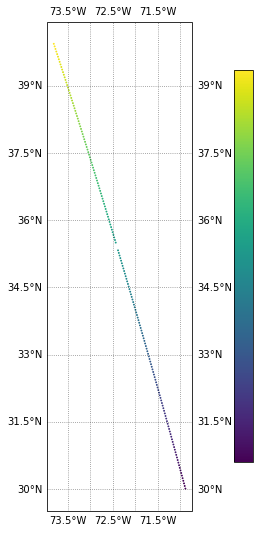

In [30]:
fig = plt.figure(num = 1, figsize=(15,9), facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m")

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)

idx = ST.lon[jt1:jt2]
idy = ST.lat[jt1:jt2]
t = ST.time[jt1:jt2]
cf = ax.scatter(idx, idy, c=t, cmap = 'viridis', marker='.', s=3 )
    
cbar = plt.colorbar(cf,shrink=0.8)
cbar.set_ticks([])



In [31]:
ST.time[jt1:jt2]

array(['2014-02-03T10:27:51.939834000', '2014-02-03T10:27:52.919834000',
       '2014-02-03T10:27:53.899834000', '2014-02-03T10:27:54.879834000',
       '2014-02-03T10:27:55.859834000', '2014-02-03T10:27:56.839834000',
       '2014-02-03T10:27:57.819834000', '2014-02-03T10:27:58.799833000',
       '2014-02-03T10:27:59.779834000', '2014-02-03T10:28:00.759834000',
       '2014-02-03T10:28:01.739834000', '2014-02-03T10:28:02.719834000',
       '2014-02-03T10:28:03.699834000', '2014-02-03T10:28:04.679834000',
       '2014-02-03T10:28:05.659834000', '2014-02-03T10:28:06.639834000',
       '2014-02-03T10:28:07.619834000', '2014-02-03T10:28:08.599834000',
       '2014-02-03T10:28:09.579834000', '2014-02-03T10:28:10.559834000',
       '2014-02-03T10:28:11.539834000', '2014-02-03T10:28:12.519834000',
       '2014-02-03T10:28:13.499834000', '2014-02-03T10:28:14.479833000',
       '2014-02-03T10:28:15.459833000', '2014-02-03T10:28:16.439834000',
       '2014-02-03T10:28:17.419834000', '2014-02-03

In [74]:
        vssh_m_np = nmp.zeros(Nt) ; vssh_m_np[:] = rmissval; # vector to store the model data interpolated in time and space (nearest-point) on the satellite track...
        vssh_m_bl = nmp.zeros(Nt) ; vssh_m_bl[:] = rmissval; # vector to store the model data interpolated in time and space (bilinear) on the satellite track...
        vdistance = nmp.zeros(Nt)
    
        # Time increment on the satellite time:
        ktm1   = 0   ; ktm2   = 0
        ktm1_o = -10 ; ktm2_o = -10


In [38]:
        vssh_s = GetSatSSH( ST.file, name_ssh_sat,  kt1=jt1, kt2=jt2-1)

In [49]:
jt=jt1+1
itt = ST.time[jt]
year_sat=pd.to_datetime(itt).year
date_model=pd.Series(MG.time)
date_model_satyear=date_model.apply(lambda dt: dt.replace(year=year_sat))
kt = ktm1
while not (date_model_satyear[kt]<=itt and date_model_satyear[kt+1]>itt): kt=kt+1
print(itt,kt,MG.time[kt])

2014-02-03T10:27:52.919834000 57 2010-02-03T09:30:00.000000000


In [50]:
ktm1 = kt ; ktm2 = kt+1


In [51]:
from gonzag.io   import GetModel2DVar, GetSatSSH

In [52]:
            if (ktm1>ktm1_o) and (ktm2>ktm2_o):
                if (ktm1_o == -10) or (ktm1 > ktm2_o):
                    if ivrb>0: print(' *** Reading '+name_ssh_mod+' in '+MG.file+'\n    => at ktm1=', ktm1)
                    Xm1 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm1 )
                else:
                    Xm1[:,:] = Xm2[:,:]


In [60]:
Xm2 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm2 )
Xa = (Xm2 - Xm1) / float((MG.time[ktm2] - MG.time[ktm1] )/ np.timedelta64(1, 's'))
Xm = Xm1[:,:] + Xa[:,:]*float((itt - date_model_satyear[ktm1])/ np.timedelta64(1, 's'))


In [61]:
            [ [j1,i1],[j2,i2],[j3,i3],[j4,i4] ] = BT.SM[jt-jt1,:,:]
            [w1, w2, w3, w4]                    = BT.WB[jt-jt1,:]

In [62]:
           Sm = MG.mask[j1,i1] + MG.mask[j2,i2] + MG.mask[j3,i3] + MG.mask[j4,i4]

In [63]:
print(Sm.values)

4


In [65]:
vssh_m_np = Xm[j1,i1]


In [66]:
print(vssh_s[0].values,vssh_m_np.values)

0.119 0.2555695


In [68]:
print(ST.lat[jt1].values,MG.lat[j1,i1].values,ST.lon[jt1].values,MG.lon[j1,i1].values)

30.010355 30.071793 289.118871 289.10782


In [75]:
for jt in range(jt1,jt2):
    print(jt)
    itt = ST.time[jt]
    year_sat=pd.to_datetime(itt).year
    date_model=pd.Series(MG.time)
    date_model_satyear=date_model.apply(lambda dt: dt.replace(year=year_sat))
    kt = ktm1
    while not (date_model_satyear[kt]<=itt and date_model_satyear[kt+1]>itt): kt=kt+1
    ktm1 = kt ; ktm2 = kt+1
    if (ktm1>ktm1_o) and (ktm2>ktm2_o):
        if (ktm1_o == -10) or (ktm1 > ktm2_o):
            Xm1 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm1 )
        else:
            Xm1[:,:] = Xm2[:,:]
        Xm2 = GetModel2DVar( MG.file, name_ssh_mod, kt=ktm2 )
        Xa = (Xm2 - Xm1) / float((MG.time[ktm2] - MG.time[ktm1] )/ np.timedelta64(1, 's'))
    Xm = Xm1[:,:] + Xa[:,:]*float((itt - date_model_satyear[ktm1])/ np.timedelta64(1, 's'))
    print(Xm.shape)
    [ [j1,i1],[j2,i2],[j3,i3],[j4,i4] ] = BT.SM[jt-jt1,:,:]
    [w1, w2, w3, w4]                    = BT.WB[jt-jt1,:]
    Sm = MG.mask[j1,i1] + MG.mask[j2,i2] + MG.mask[j3,i3] + MG.mask[j4,i4]
    if Sm == 4 and j1 > 0 and i1 > 0:
                print(j1,i1)
                vssh_m_np[jt-jt1] = Xm[j1,i1] ; # Nearest-point "interpolation"
                Sw = nmp.sum([w1, w2, w3, w4])
                if abs(Sw-1.)> 0.001:
                    if ivrb>0: print('    FLAGGING MISSING VALUE at jt = '+str(jt)+' !!!')
                else:
                    vssh_m_bl[jt-jt1] = w1*Xm[j1,i1] + w2*Xm[j2,i2] + w3*Xm[j3,i3] + w4*Xm[j4,i4]
            
    ktm1_o = ktm1 ; ktm2_o = ktm2


168
(763, 611)
169
(763, 611)
4 427
170
(763, 611)
8 426
171
(763, 611)
12 425
172
(763, 611)
16 424
173
(763, 611)
20 423
174
(763, 611)
24 422
175
(763, 611)
28 421
176
(763, 611)
33 420
177
(763, 611)
37 419
178
(763, 611)
41 418
179
(763, 611)
45 417
180
(763, 611)
49 416
181
(763, 611)
53 416
182
(763, 611)
57 415
183
(763, 611)
61 414
184
(763, 611)
66 413
185
(763, 611)
70 412
186
(763, 611)
74 411
187
(763, 611)
78 410
188
(763, 611)
82 409
189
(763, 611)
86 408
190
(763, 611)
91 407
191
(763, 611)
95 406
192
(763, 611)
99 405
193
(763, 611)
103 404
194
(763, 611)
107 403
195
(763, 611)
111 402
196
(763, 611)
116 401
197
(763, 611)
120 401
198
(763, 611)
124 400
199
(763, 611)
128 399
200
(763, 611)
132 398
201
(763, 611)
137 397
202
(763, 611)
141 396
203
(763, 611)
145 395
204
(763, 611)
149 394
205
(763, 611)
154 393
206
(763, 611)
158 392
207
(763, 611)
162 391
208
(763, 611)
166 390
209
(763, 611)
170 389
210
(763, 611)
175 388
211
(763, 611)
179 387
212
(763, 611)
183 386

In [77]:
lat_m = nmp.zeros(Nt) ; lat_m[:] = rmissval;
lon_m = nmp.zeros(Nt) ; lon_m[:] = rmissval;
for jt in range(jt1,jt2):
    [ [j1,i1],[j2,i2],[j3,i3],[j4,i4] ] = BT.SM[jt-jt1,:,:]
    lat_m[jt-jt1]=MG.lat[j1,i1].values
    lon_m[jt-jt1]=MG.lon[j1,i1].values

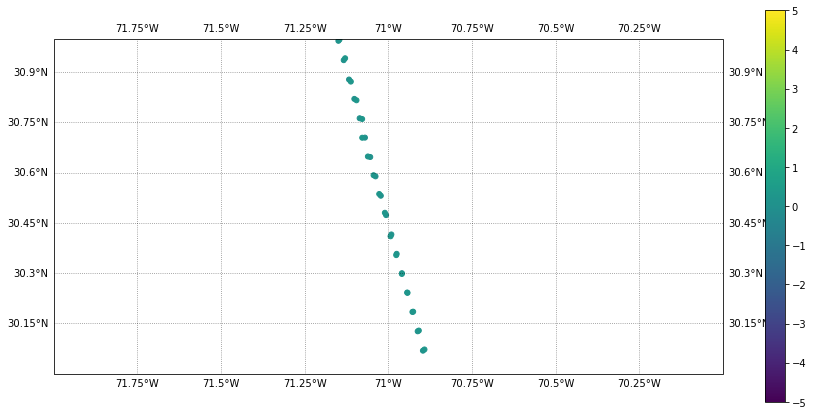

In [84]:
fig = plt.figure(num = 1, figsize=(15,9), facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines(resolution="10m")
ax.set_extent([-72, -70, 30,31])
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)

idx = ST.lon[jt1+1:jt2]
idy = ST.lat[jt1+1:jt2]
t=vssh_s[1:]
cf = ax.scatter(idx, idy, c=t, cmap = 'viridis',vmin=-5, vmax=5, marker='.', s=100 )
cf = ax.scatter(idx, idy, c=t, cmap = 'viridis',vmin=-5, vmax=5, marker='.', s=100 )
idx = lon_m[1:]
idy = lat_m[1:]
t=vssh_m_np[1:]
   
cbar = plt.colorbar(cf,shrink=0.8)
cbar.set_ticks([-5,-4,-3,-2,-1,0,1,2,3,4,5])



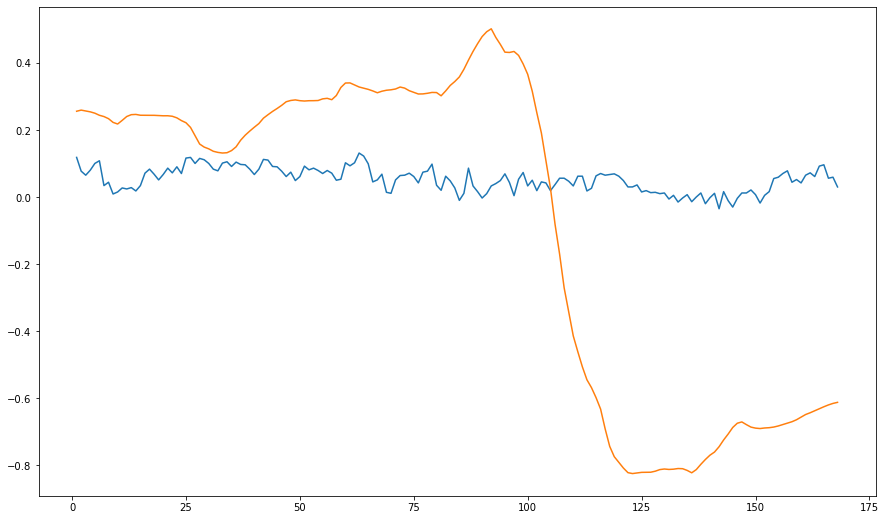

In [87]:
fig = plt.figure(num = 1, figsize=(15,9), facecolor='w', edgecolor='k')
ax = plt.subplot(111)
vmodel_mask=nmp.ma.masked_where(vssh_m_np==-9.99900000e+03, vssh_m_np)
vsat_mask=nmp.ma.masked_where(vssh_m_np==-9.99900000e+03, vssh_s)
plt.plot(vsat_mask, label='sat')
plt.plot(vmodel_mask, label='mod')
